#    Scikit-learn分类

#    例1：digit分类

In [1]:
###不显示警告信息
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

D:\anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
digits = datasets.load_digits() # 加载数据

D:\anaconda\lib\site-packages\sklearn\datasets\base.py:550: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = data[:, -1].astype(np.int)


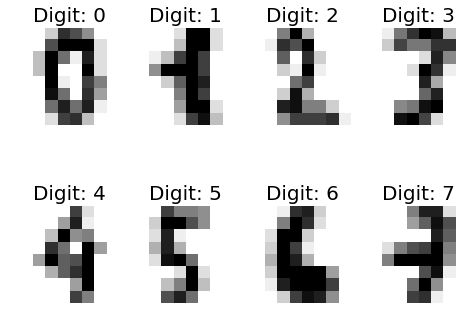

In [3]:
# 把数据所代表的图片显示出来
#for index, (image, label) in enumerate(images_and_labels[8:16]):
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6))
for index, (image, label) in enumerate(images_and_labels[20:28]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, fontsize=20);

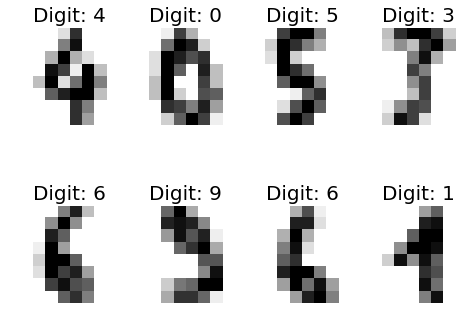

In [6]:
# 把数据所代表的图片显示出来
#for index, (image, label) in enumerate(images_and_labels[8:16]):
s1=100;
s2=s1+8;
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6))
for index, (image, label) in enumerate(images_and_labels[s1:s2]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, fontsize=20);

In [7]:
#在进行机器学习时，需要把数据保存为样本个数*特征个数格式的array对象，手写数字识别，scikit-learn保存在digits.data数据里。
print("shape of raw image data: {0}".format(digits.images.shape))
print("shape of data: {0}".format(digits.data.shape))

shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


总共有1797个训练样本，其中原始的数据是8*8的图片，而用来训练的数据是把图片的64个象素点都转换为特征。

#    模型选择
不同的机器学习算法模型针对特定的机器学习应用有不同的效率，这里使用支持向量机作为手写识别算法的模型。

模型训练
在开始训练模型之前，需要先把数据集分成训练数据集和测试数据集。
下面代码把数据集分出20%作为测试数据集。

In [8]:
# 把数据分成训练数据集和测试数据集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=2);
#X_train,X_test, y_train, y_test =train_test_split(train_data,train_target,test_size=0.25, random_state=0,stratify=y)
# train_data：所要划分的样本特征集
# train_target：所要划分的样本结果
# test_size：样本占比，如果是整数的话就是样本的数量
# random_state：是随机数的种子。
# 随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样


In [9]:
Xtrain.shape

(1437, 64)

In [10]:
Ytrain.shape

(1437,)

In [11]:
Xtest.shape

(360, 64)

In [12]:
###不显示警告信息
import warnings
warnings.filterwarnings("ignore")

In [13]:
# 使用支持向量机来训练模型
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100., probability=True)
clf.fit(Xtrain, Ytrain);

SVM 是一种用于分类和回归的监督学习算法。在分类任务中，SVM 构建一个决策边界，将不同类别的样本分开。SVC 类则实现了标准的支持向量机分类器。

在使用SVM进行模型训练时，可以通过调整gamma和C参数来优化模型的性能。gamma参数控制着核函数的宽度，而C是惩罚参数，它决定了模型对误分类的惩罚程度。较小的 C 值会允许更多的错误分类，较大的 C 值会迫使模型更加关注每个样本的分类准确性。

实用:gamma和C参数都有一些常用的设置。


训练完成后，clf对象就会包含我们训练出来 的模型参数，可以使用这个模型对象来进行预测。

用训练出来的模型clf预测测试数据集，然后把预测结果Ypred和真正的结果Ytest比较，看有多少个是正确的，这样就能评估出模型的准确度了。
Scikit-learn提供了现成的方法来完成这项工作。

In [14]:
# 评估模型的准确度
from sklearn.metrics import accuracy_score
Ypred = clf.predict(Xtest);   #预测标签。
Ypred

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 8, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 8, 4, 7,
       3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 9, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
       4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [15]:
###比较预测结果和真实标签。
accuracy_score(Ytest, Ypred)

0.9777777777777777

In [ ]:
### 在test集上计算平均准确率
clf.score(Xtest, Ytest)

还可以直接把测试数据集里的部分图片显示出来，并且在图片的左下角显示预测值，右下角显示真实值 。

Tips:如何展示实验结果。

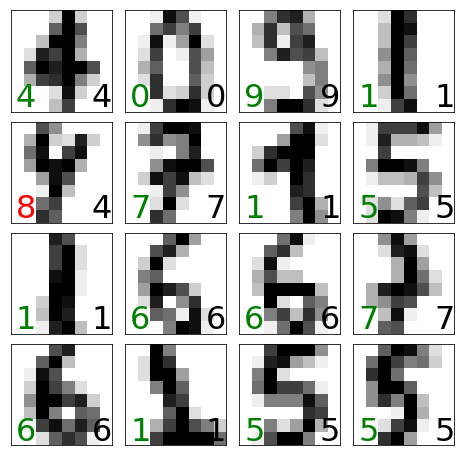

In [16]:
# 查看预测的情况
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0.05, 0.05, str(Ypred[i]), fontsize=32,
            transform=ax.transAxes,
            color='green' if Ypred[i] == Ytest[i] else 'red')   ##如果预测结果正确，显示绿色；如果不正确，显示红色。
    ax.text(0.8, 0.05, str(Ytest[i]), fontsize=32,
            transform=ax.transAxes,
            color='black')
    ax.set_xticks([])
    ax.set_yticks([])

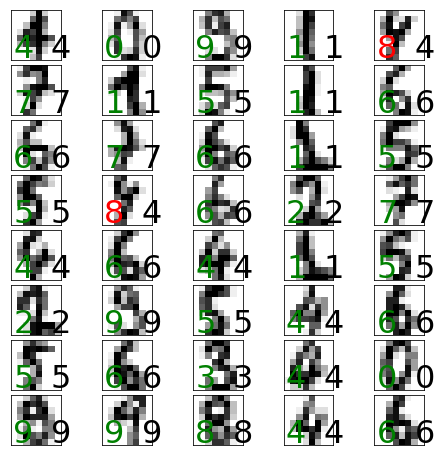

In [17]:
######修改上面程序 ，查看更多结果。是由子窗口数目确定
# 改为5行6列
#fig, axes = plt.subplots(5, 6, figsize=(8, 8))   #
#fig, axes = plt.subplots(5, 8, figsize=(8, 8)) 
fig, axes = plt.subplots(8,5, figsize=(8, 8)) 

fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):   #####控制 
    ax.imshow(Xtest[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0.05, 0.05, str(Ypred[i]), fontsize=32,
            transform=ax.transAxes,
            color='green' if Ypred[i] == Ytest[i] else 'red')   ##如果预测结果正确，显示绿色；如果不正确，显示红色。
    ax.text(0.8, 0.05, str(Ytest[i]), fontsize=32,
            transform=ax.transAxes,
            color='black')
    ax.set_xticks([])
    ax.set_yticks([])

#   例2：IRIS数据分类

通过以下代码展示了Scikit-Learn包的K近邻算法如何对于IRIS数据集进行分类及分类预测结果

有了前面的基础，再看这个例子就简单许多。

In [18]:
###### 导入所需要的工具包
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
#train_test_split函数可按照设定的比例，随机将样本集合划分为训练集和测试集，并返回划分好的训练集和测试集数据
from sklearn.model_selection import train_test_split

#加载IRIS数据集
IRIS = load_iris()
#X:待划分的样本特征集合;y:待划分的样本标签;test_size:若在0~1之间，为测试集样本数目与原始样本数目之比；若为整数，则是测试集样本的数目。random_state:随机数种子
#X_train, X_test, y_train, y_test = train_test_split(IRIS['data'], IRIS['target'], random_state=0)
#默认训练集0.75，测试集0.25
X_train, X_test, y_train, y_test = train_test_split(IRIS['data'], IRIS['target'],test_size=0.3, random_state=0)
#改变testsize的值0.3；  还可以  0.2,0.3,0.35,0.4，0.5  观察准确率的变化 


#导入sklearn中k近邻分类模型
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors：knn算法中指定以最近的几个最近邻样本具有投票权，默认参数为5
knn = KNeighborsClassifier(n_neighbors=5)
#训练模型
knn.fit(X_train, y_train)

#进行预测
y_pred = knn.predict(X_test)
#输出准确率
##print ('预测准确率:',knn.score(, y_test))
print ('预测准确率:',knn.score(X_test, y_test))

预测准确率: 0.9777777777777777


###    使用其它分类模型

通过以下代码展示了Scikit-Learn包的朴素贝叶斯算法如何对于IRIS数据集进行分类及分类预测结果

In [19]:
#导入所需要的工具包
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
#train_test_split函数可按照设定的比例，随机将样本集合划分为训练集和测试集，并返回划分好的训练集和测试集数据
from sklearn.model_selection import train_test_split

#加载IRIS数据集
IRIS = load_iris()
#X:待划分的样本特征集合;y:待划分的样本标签;test_size:若在0~1之间，为测试集样本数目与原始样本数目之比；若为整数，则是测试集样本的数目。random_state:随机数种子
X_train, X_test, y_train, y_test = train_test_split(IRIS['data'], IRIS['target'], random_state=0)

#导入sklearn中朴素贝叶斯方法
from sklearn.naive_bayes import GaussianNB                  
#初始化模型
GNB = GaussianNB()                                     
#训练模型
GNB.fit(X_train, y_train)

#进行预测
y_pred = GNB.predict(X_test)
#输出准确率
print ('预测准确率:',GNB.score(X_test, y_test))

预测准确率: 1.0


从上面可以看出，改变一个模型非常方便。

通过以下代码展示了Scikit-Learn包的决策树算法如何对于IRIS数据集进行分类及分类预测结果

In [20]:
#导入所需要的工具包
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
#train_test_split函数可按照设定的比例，随机将样本集合划分为训练集和测试集，并返回划分好的训练集和测试集数据
from sklearn.model_selection import train_test_split

#加载IRIS数据集
IRIS = load_iris()
#X:待划分的样本特征集合;y:待划分的样本标签;test_size:若在0~1之间，为测试集样本数目与原始样本数目之比；若为整数，则是测试集样本的数目。random_state:随机数种子
X_train, X_test, y_train, y_test = train_test_split(IRIS['data'], IRIS['target'], random_state=0)

######################################33
#导入sklearn中决策树方法
from sklearn import tree
#导入决策树DTC包
from sklearn.tree import DecisionTreeClassifier                
#初始化模型
DTREE = DecisionTreeClassifier()                                        
#训练模型
DTREE.fit(X_train, y_train)

#进行预测
y_pred = DTREE.predict(X_test)
#输出准确率
print ('预测准确率:',DTREE.score(X_test, y_test))

预测准确率: 0.9736842105263158
